### Elmo Based Classifiers

On this NB we are using elmo embeddings to classify text, but not in the typical way to use elmo embeddings because I am not using the emeddings directly extracted from Elmo but elmo embeddings from an elmo layer finetunned on our data.

In [1]:
import os
import pandas as pd
import numpy as np

os.listdir()

['.ipynb_checkpoints',
 'amaz_df.csv',
 'elmo_embs_Classifiers.ipynb',
 'embs_10k_train.csv',
 'embs_2k_test.csv',
 'model_10e_.h5']

In [2]:
df = pd.read_csv('amaz_df.csv', sep = ';')
df.head()

,sentences,labels
0,Stuning even for the non-gamer: This sound tra...,1
1,The best soundtrack ever to anything.: I'm rea...,1
2,Amazing!: This soundtrack is my favorite music...,1
3,Excellent Soundtrack: I truly like this soundt...,1
4,"Remember, Pull Your Jaw Off The Floor After He...",1


C:\Users\f.gonzalez\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='labels', ylabel='count'>

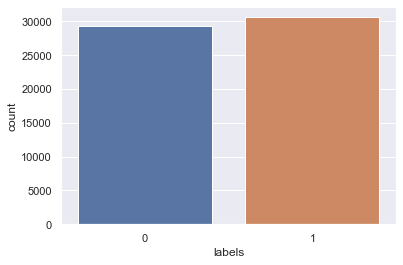

In [14]:
import seaborn as sns
sns.set()
sns.countplot(df['labels'])

<AxesSubplot:>

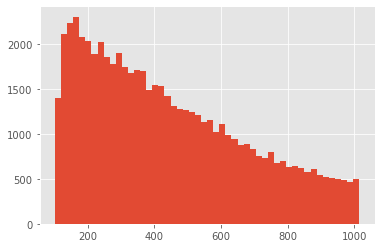

In [13]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
df['sentences'].apply(lambda x: len(str(x))).hist(bins = 50)

In [3]:
embs_train, embs_test = np.loadtxt(open("embs_10k_train.csv", "rb"), delimiter=","), np.loadtxt(open("embs_2k_test.csv", "rb"), delimiter=",")

embs_train.shape, embs_test.shape

((10000, 1024), (2000, 1024))

In [4]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import LinearSVC
from sklearn import model_selection

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB


We are not using models based in NB because we are dealing with negativa values

In [5]:
x_train, y_train = embs_train, df['labels'].values[:10000]
x_test, y_test = embs_test, df['labels'].values[50000:52000]
print(f" Shapes for Machine Learning, {x_train.shape, y_train.shape}")

svc = LinearSVC( max_iter=2000)
svc.fit(x_train, y_train)
print(" Svc Trained!")

rd = RidgeClassifier()
rd.fit(x_train, y_train)
print(" Ridge Classifier Trained!")


lg = LogisticRegression(solver = 'saga', max_iter=1000)
lg.fit(x_train, y_train)
print(" Logistic Reg Trained!")


adab = AdaBoostClassifier(n_estimators=100, random_state=42)
adab.fit(x_train, y_train)
print(" AdaBoost Trained!")

 Shapes for Machine Learning, ((10000, 1024), (10000,))


C:\Users\f.gonzalez\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


 Svc Trained!
 Ridge Classifier Trained!
 Logistic Reg Trained!
 AdaBoost Trained!


 Defining metrics function
Results for model LinearSVC(max_iter=2000) ---> 
 Confusion matrix ---> : 
 [[820 134]
 [129 917]]
 Accuracy:  86.85% 
 
Results for model RidgeClassifier() ---> 
 Confusion matrix ---> : 
 [[822 132]
 [137 909]]
 Accuracy:  86.55% 
 
Results for model LogisticRegression(max_iter=1000, solver='saga') ---> 
 Confusion matrix ---> : 
 [[828 126]
 [131 915]]
 Accuracy:  87.15% 
 
Results for model AdaBoostClassifier(n_estimators=100, random_state=42) ---> 
 Confusion matrix ---> : 
 [[785 169]
 [176 870]]
 Accuracy:  82.75% 
 


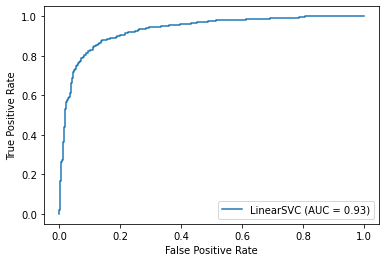

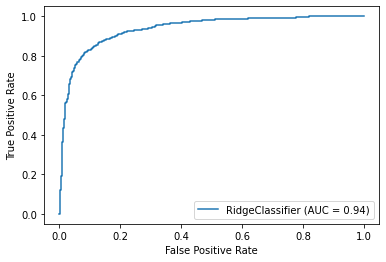

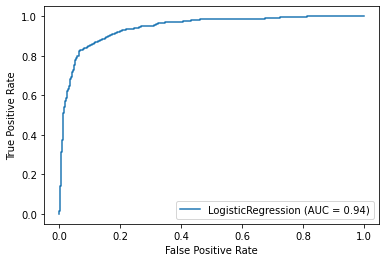

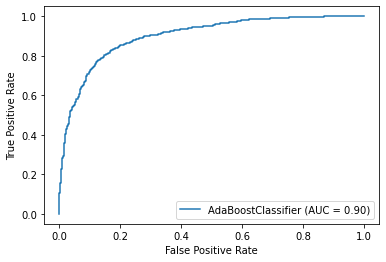

In [6]:
print(" Defining metrics function")

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve


def evaluate_models(c_list:list):
    for classifier in c_list:
        print(f"Results for model {classifier} ---> ")
        y_pred = classifier.predict(x_test)
        print(f" Confusion matrix ---> : \n {confusion_matrix(y_test, y_pred)}")
        print(f" Accuracy:  {np.round(accuracy_score(y_test, y_pred) * 100, 2)}% ")
        plot_roc_curve(classifier, x_test, y_test)
        print(" ")

evaluate_models([svc, rd, lg, adab])

Soft Voting/Majority Rule classifier for unfitted estimators.

In [7]:
svc1 = LinearSVC( max_iter=2000)
rd1 = RidgeClassifier()
lg1 = LogisticRegression(solver = 'saga', max_iter=1000)
adab1 = AdaBoostClassifier(n_estimators=100, random_state=42)

In [8]:
for clf, label in zip([svc1, rd1, lg1, adab1], ['SVC', 'Ridge Class', 'Logistic Regresion', 'Adaboost']):
    scores = cross_val_score(clf, x_train, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

C:\Users\f.gonzalez\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\f.gonzalez\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\f.gonzalez\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\f.gonzalez\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\f.gonzalez\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase

Accuracy: 0.86 (+/- 0.01) [SVC]
Accuracy: 0.87 (+/- 0.01) [Ridge Class]
Accuracy: 0.88 (+/- 0.01) [Logistic Regresion]
Accuracy: 0.82 (+/- 0.01) [Adaboost]


In [9]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(
     estimators=[('svc', svc1), ('rd', rd1), ('lg', lg1), ('adab', adab1)],
     voting='hard')
eclf.fit(x_train, y_train)
y_pred = eclf.predict(x_test)
print(f" Confusion matrix ---> : \n {confusion_matrix(y_test, y_pred)}")
print(f" Accuracy:  {np.round(accuracy_score(y_test, y_pred) * 100, 2)}% ")

C:\Users\f.gonzalez\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


 Confusion matrix ---> : 
 [[843 111]
 [138 908]]
 Accuracy:  87.55% 


Results have not improved but model should be able to generalize better.

# Test Report

In [10]:
test_df = pd.DataFrame({'real': y_test,  'svc': svc.predict(x_test), 'ridge_class': rd.predict(x_test),
                        'log_reg': lg.predict(x_test), 'adab': adab.predict(x_test)})
test_df.head(20)

,real,svc,ridge_class,log_reg,adab
0,1,1,1,1,1
1,1,1,1,1,1
2,0,0,0,0,1
3,1,1,1,1,1
4,1,1,1,1,0
5,0,0,0,0,0
6,0,0,0,0,0
7,0,0,0,0,0
8,1,1,1,1,1
9,0,0,0,0,1
